In [41]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps, ImageEnhance
from src.filter_reconst import filter_reconstruction
from src.V1_Compress import generate_Y, compress
import pandas as pd
import seaborn as sns
import time
import os.path

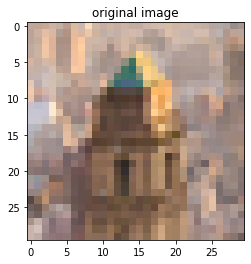

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


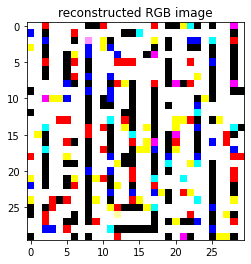

In [42]:
image_path = 'image/city_part2.png'
num_cell = 200
cell_size = 7
sparse_freq = 2
alpha = 0.01

filter_dim = (30, 30)
filt = np.zeros(filter_dim)

img = Image.open(image_path)
img_arr = np.asarray(img)
# dim = img_arr.shape

i = 0
dim = img_arr[:,:,i].shape

W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
final = np.zeros(img_arr.shape)

# with same V1 cells generated, reconstruct images for each of 3 rgb arrays and append to final
while (i < 3):
    img_arr_pt = img_arr[:,:,i]
    img_arr_pt_dim = img_arr_pt.shape
    n_pt, m_pt = img_arr_pt_dim
    y = generate_Y(W, img_arr_pt)
    W_model = W.reshape(num_cell, n_pt, m_pt)
    theta, reform, s = compress(W_model, y, alpha)
    final[:,:,i] = reform
    i+=1
    
# final = np.round(final).astype(int)

plt.imshow(img_arr)
plt.title("original image")
plt.show()

plt.imshow(final, vmin = 0, vmax=255)
plt.title("reconstructed RGB image")
plt.show()


In [43]:
np.min(img_arr - final)

-577.1090676146468

In [56]:
img_arr[0:, ]

array([[[192, 167, 154],
        [193, 165, 149],
        [200, 168, 150],
        ...,
        [176, 165, 160],
        [155, 141, 140],
        [165, 150, 148]],

       [[185, 164, 155],
        [203, 176, 157],
        [229, 189, 163],
        ...,
        [175, 152, 139],
        [191, 162, 147],
        [187, 165, 154]],

       [[186, 165, 156],
        [195, 172, 154],
        [238, 194, 162],
        ...,
        [180, 153, 138],
        [185, 145, 121],
        [197, 161, 136]],

       ...,

       [[168, 147, 138],
        [195, 176, 166],
        [163, 145, 143],
        ...,
        [161, 144, 144],
        [147, 130, 132],
        [157, 135, 136]],

       [[200, 180, 171],
        [211, 191, 187],
        [158, 137, 139],
        ...,
        [171, 146, 140],
        [152, 132, 131],
        [162, 141, 134]],

       [[201, 180, 172],
        [192, 172, 166],
        [147, 128, 127],
        ...,
        [152, 123, 112],
        [139, 118, 111],
        [113,  97,  95]]

In [39]:
np.max(final)

691.7821660947995

In [51]:
img_arr_grey = ImageOps.grayscale(img)
img_arr_grey = np.asarray(img_arr_grey)

In [53]:
filter_reconstruction(num_cell = num_cell, img_arr = img_arr_grey, 
                                          sparse_freq = sparse_freq, cell_size = cell_size, alpha = alpha, filter_dim = (10, 10))

(40, 40)
iteration 3
iteration 6
iteration 9
iteration 12
iteration 15


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase th

array([[170.80723773, 173.80167311, 175.78138467, 186.98199712,
        177.17954596, 165.14000518, 192.99754628, 190.15301711,
        223.51260786, 191.03108831, 180.17880043, 187.84080502,
        180.46878757, 184.16811479, 179.14356245, 179.10582812,
        187.59300354, 187.76390079, 195.11102287, 193.55319734,
        189.74297414, 189.51486513, 187.00407716, 184.36806028,
        180.28200248, 169.94357898, 174.78180649, 163.32926163,
        148.8348576 , 153.06457448],
       [171.52753514, 180.14436855, 197.10505298, 189.69937497,
        162.81994848, 154.70127007, 192.81768643, 194.98993302,
        204.32835431, 184.30262179, 179.1566081 , 181.68529868,
        180.89569439, 188.22862178, 193.01527355, 186.41079034,
        167.04377018, 166.25395302, 175.36869225, 196.75013356,
        188.2622368 , 187.69831917, 188.50551966, 192.03897729,
        191.90899248, 178.89874556, 174.57623248, 165.00772435,
        162.90158094, 171.83433281],
       [168.87841826, 177.5878

In [58]:
final.shape

(30, 30, 3)

In [59]:
img_arr.shape

(30, 30, 3)

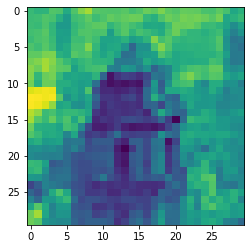

In [67]:
plt.imshow(img_arr[:,:,2])

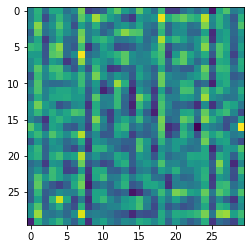

In [70]:
plt.imshow(final[:,:,2])